In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from os import system

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [2]:
df = pd.read_excel("Election_Data.xlsx",sheet_name='Election_Dataset_Two Classes')
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [3]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [4]:
df.shape

(1525, 10)

In [5]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
Unnamed: 0                 1525 non-null int64
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(8), object(2)
memory usage: 119.2+ KB


In [7]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

##### Uni-Variate Analysis

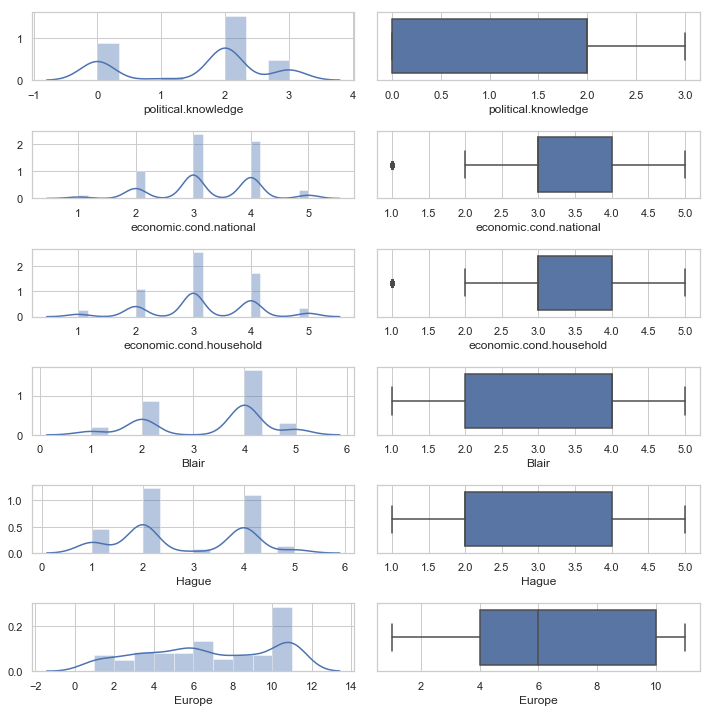

In [9]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(10,10)
sns.distplot(df['political.knowledge'], kde=True, ax=axes[0][0])
sns.boxplot(x='political.knowledge', data=df, ax=axes[0][1])
sns.distplot(df['economic.cond.national'] , kde=True, ax=axes[1][0])
sns.boxplot(x='economic.cond.national', data=df , ax=axes[1][1])
sns.distplot(df['economic.cond.household'] , kde=True, ax=axes[2][0])
sns.boxplot(x='economic.cond.household', data=df , ax=axes[2][1])
sns.distplot(df['Blair'], kde=True, ax=axes[3][0])
sns.boxplot(x='Blair', data=df, ax=axes[3][1])
sns.distplot(df['Hague'] , kde=True, ax=axes[4][0])
sns.boxplot(x='Hague', data=df , ax=axes[4][1])
sns.distplot(df['Europe'] , kde=True, ax=axes[5][0])
sns.boxplot(x='Europe', data=df , ax=axes[5][1])
plt.tight_layout()
plt.show()

##### Bi-Variate Analysis

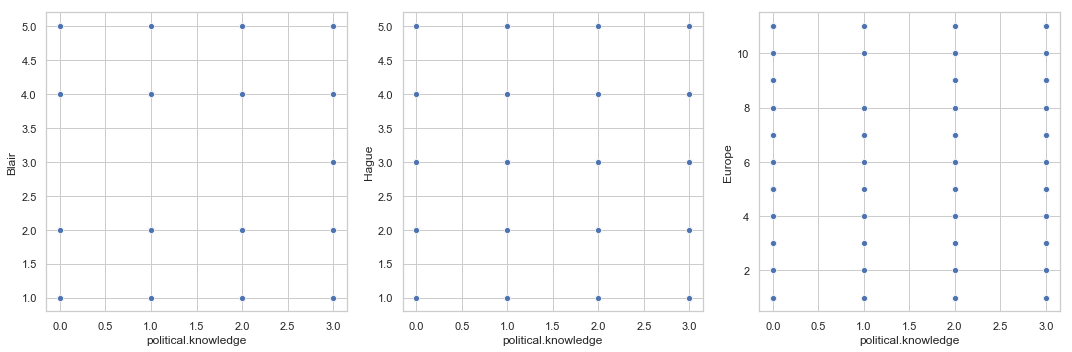

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(15,5)
# plt.figure(figsize=(12,7))
sns.scatterplot(df['political.knowledge'], df['Blair'], ax=axes[0])
sns.scatterplot(df['political.knowledge'], df['Hague'], ax=axes[1])
sns.scatterplot(df['political.knowledge'], df['Europe'], ax=axes[2])
plt.tight_layout()
plt.show()

##### Multi-Variate Analysis

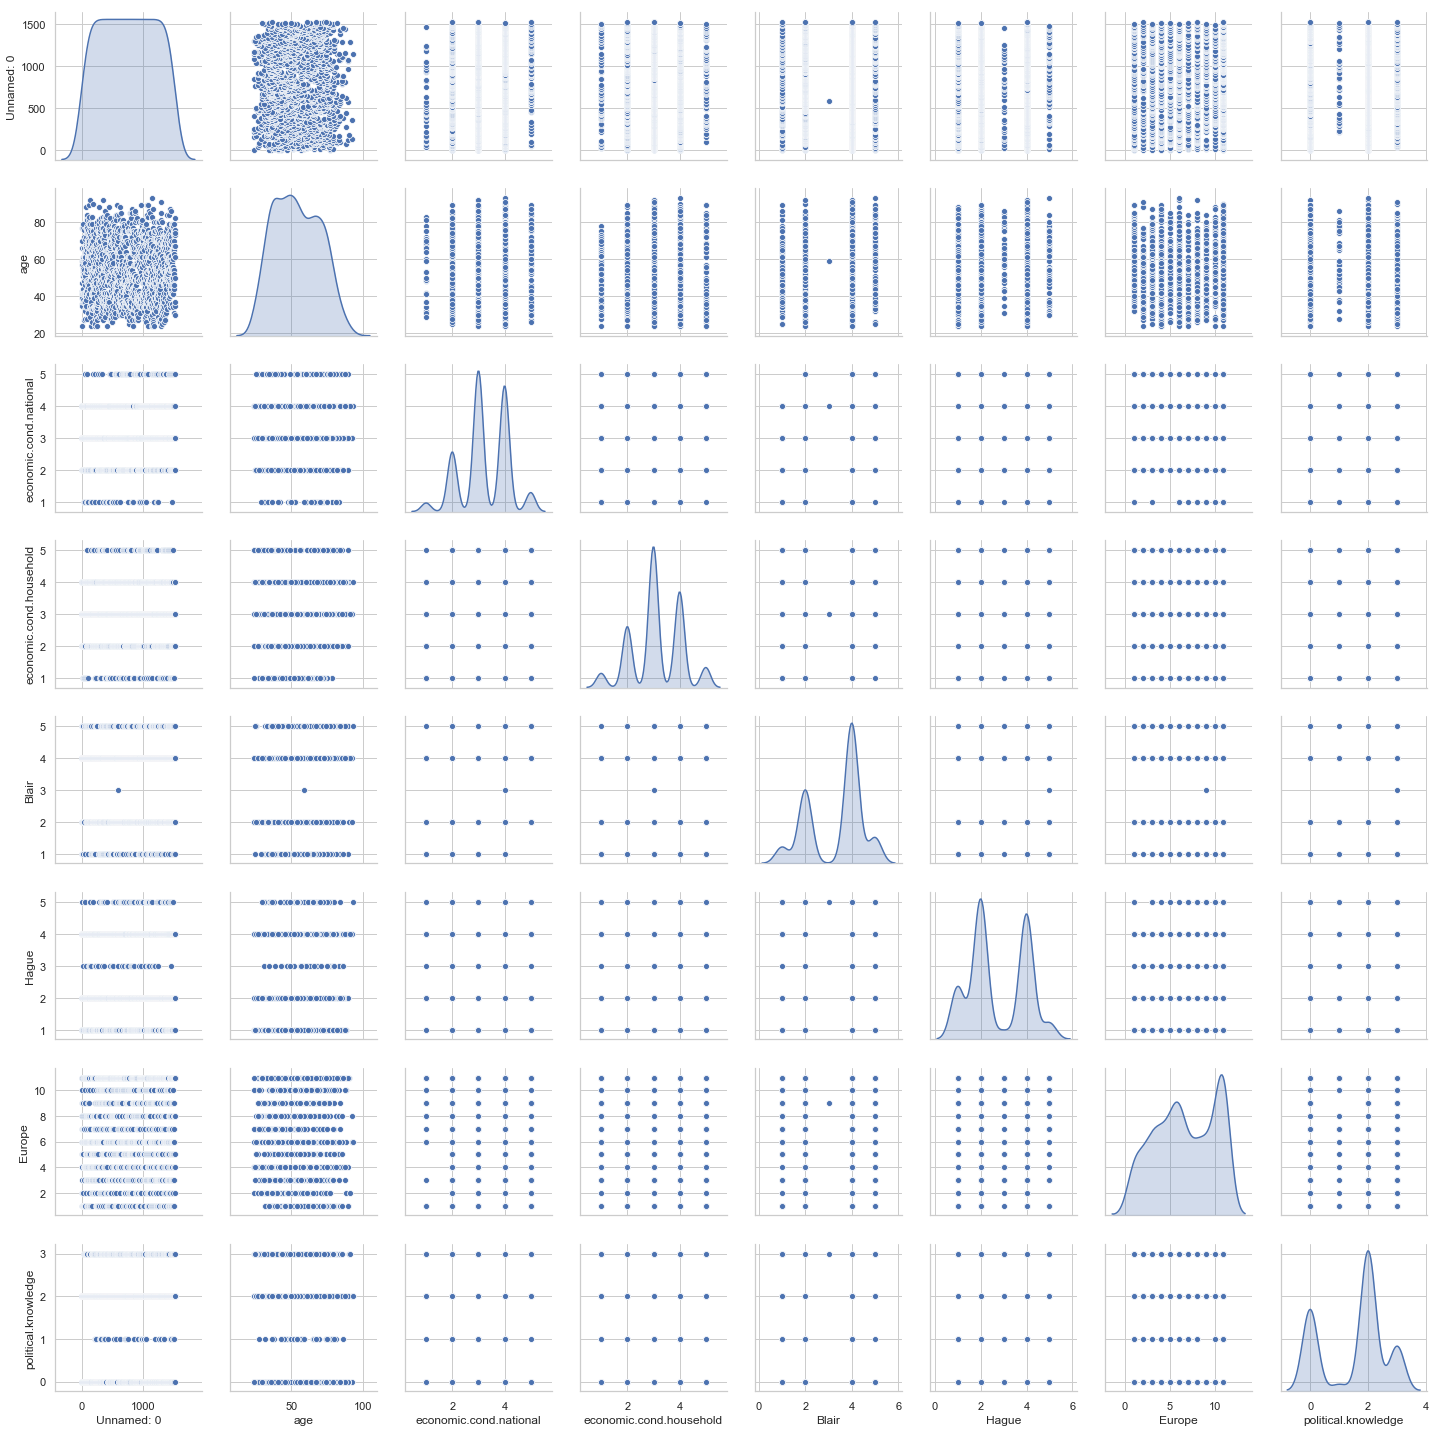

In [11]:
sns.pairplot(df,diag_kind="kde")

In [12]:
df.corr()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
Unnamed: 0,1.000000,0.005128,0.071882,0.035907,0.001602,0.000282,0.038218,0.002485
age,0.005128,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.071882,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,0.035907,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.001602,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.000282,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.038218,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,0.002485,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


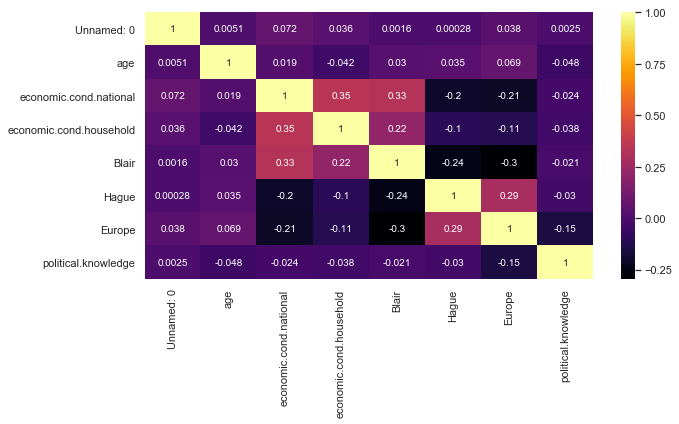

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.tight_layout()
plt.show()

In [14]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(include = ['float64','int64'])

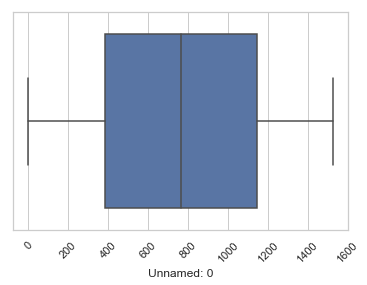

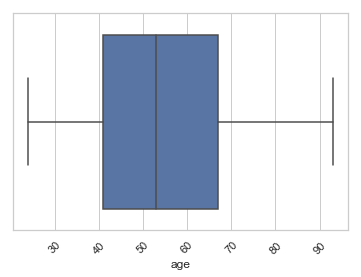

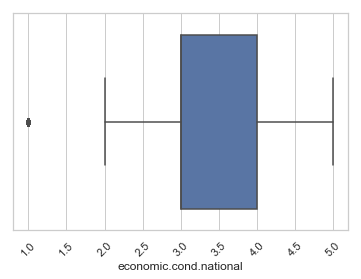

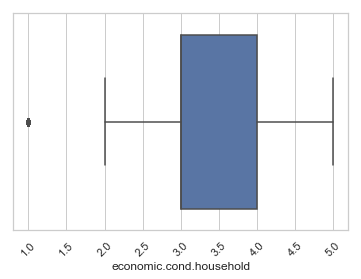

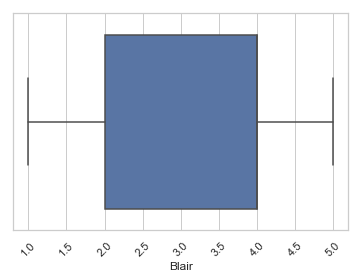

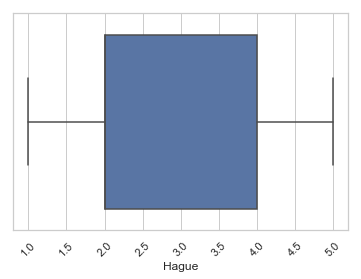

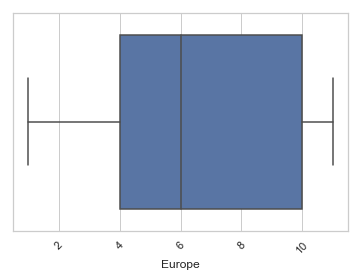

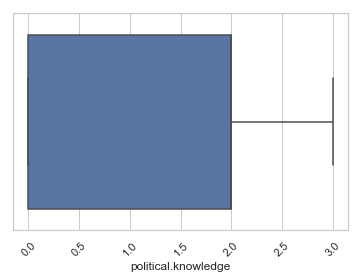

In [15]:
# df_num["economic.cond.national","economic.cond.household"].boxplot(figsize=(20,3))
for feature in df_num.columns:
    sns.boxplot(df_num[feature])
    plt.xticks(rotation=45)
    plt.show()

###### Inference

From the above boxplot, we can infer that, the outliers are present in "economic.cond.national","economic.cond.household". It is not needed to treat the outlier.

In [16]:
new_df_scaled = pd.concat([df_cat, df_num], axis=1)
new_df_scaled.head()

,vote,gender,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,Labour,female,1,43,3,3,4,1,2,2
1,Labour,male,2,36,4,4,4,4,5,2
2,Labour,male,3,35,4,4,5,2,3,2
3,Labour,female,4,24,4,2,2,1,4,0
4,Labour,male,5,41,2,2,1,1,6,2


In [17]:
new_df_scaled = df.drop("Unnamed: 0", axis=1)
new_df_scaled = new_df_scaled.drop("age", axis=1)
new_df_scaled.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,3,3,4,1,2,2,female
1,Labour,4,4,4,4,5,2,male
2,Labour,4,4,5,2,3,2,male
3,Labour,4,2,2,1,4,0,female
4,Labour,2,2,1,1,6,2,male


In [18]:
for column in new_df_scaled.columns:
    print(column.upper(),': ',new_df_scaled[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

In [19]:
df_encoded = pd.get_dummies(new_df_scaled, columns=['gender','vote'],drop_first=True)
df_encoded.head()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
0,3,3,4,1,2,2,0,1
1,4,4,4,4,5,2,1,1
2,4,4,5,2,3,2,1,1
3,4,2,2,1,4,0,0,1
4,2,2,1,1,6,2,1,1


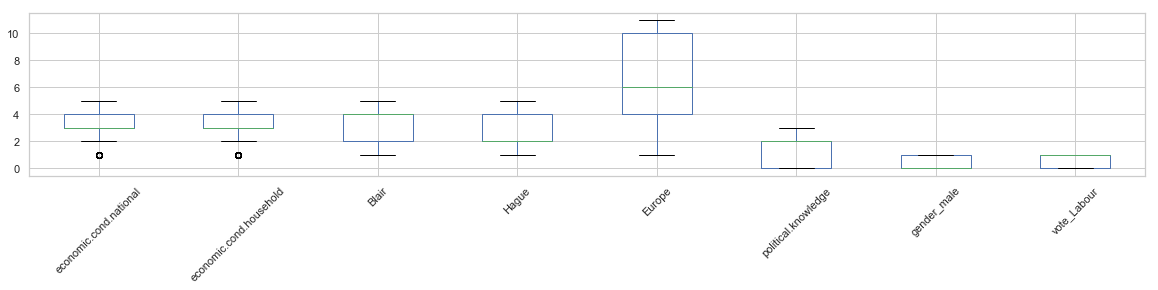

In [20]:
df_encoded.boxplot(figsize=(20,3))
plt.xticks(rotation=45)
plt.show()

Inference from the above boxplot, Since all the values(mean, Standard deviation and data range) are in same scale, scaling is not neccessary.

In [21]:
X = df_encoded.drop('vote_Labour', axis=1)

y = df_encoded[['vote_Labour']]
X.head()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,3,3,4,1,2,2,0
1,4,4,4,4,5,2,1
2,4,4,5,2,3,2,1
3,4,2,2,1,4,0,0
4,2,2,1,1,6,2,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

The Target variable and other variables are separated and training and testing data are splitted using train_test_split function in the ratio of 70:30.

In [23]:
X_train.head()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
1372,4,4,4,2,2,2,1
126,4,3,4,4,2,2,1
327,3,3,2,4,9,2,1
292,3,3,4,2,6,1,0
1058,3,4,4,2,8,0,0


### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

##### Logistic Regression 

In [24]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)

In [26]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3)

In [27]:
grid_search.fit(X_train, y_train)

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array w

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000),
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]})

In [28]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}

In [29]:
best_model = grid_search.best_estimator_
best_model

LogisticRegression(max_iter=100000)

In [30]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)
ytrain_predict

array([1, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [31]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.028499,0.971501
1,0.040554,0.959446
2,0.027610,0.972390
3,0.449134,0.550866
4,0.369517,0.630483


In [32]:
confusion_matrix(y_train,ytrain_predict)

array([[222, 107],
       [ 65, 673]], dtype=int64)

In [33]:
confusion_matrix(y_test, ytest_predict)

array([[ 81,  52],
       [ 34, 291]], dtype=int64)

In [34]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       329
           1       0.86      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.84      0.84      0.84      1067
 



In [35]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       133
           1       0.85      0.90      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.75      0.76       458
weighted avg       0.81      0.81      0.81       458
 



AUC: 0.892


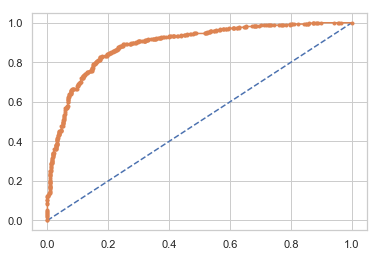

In [36]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.868


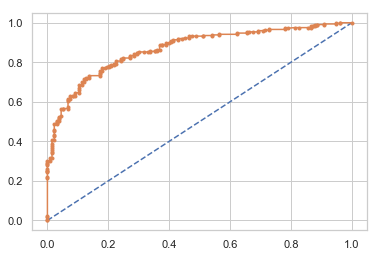

In [37]:
# AUC and ROC for the test data


# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [38]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
dftr=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(dftr.loc["1"][2],2)
lr_train_recall=round(dftr.loc["1"][1],2)
lr_train_precision=round(dftr.loc["1"][0],2)
lr_train_acc=round(dftr.loc["accuracy"][0],2)

print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)
print ('lr_train_acc ',lr_train_acc)

lr_train_precision  0.89
lr_train_recall  0.86
lr_train_f1  0.91
lr_train_acc  0.84


In [39]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
dft=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(dft.loc["1"][2],2)
lr_test_recall=round(dft.loc["1"][1],2)
lr_test_precision=round(dft.loc["1"][0],2)
lr_test_acc=round(dft.loc["accuracy"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)
print ('lr_test_acc',lr_test_acc)

lr_test_precision  0.87
lr_test_recall  0.85
lr_test_f1  0.9
lr_test_acc 0.81


##### LDA

In [40]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)
model

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [41]:
# Predict it
pred_class_train = model.predict(X_train)

In [42]:
pred_class_test = model.predict(X_test)

In [43]:
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [44]:
model.score(X_train,y_train)

0.8406747891283973

In [45]:
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.77      0.68      0.73       329
           1       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [46]:
confusion_matrix(y_train, pred_class_train)

array([[225, 104],
       [ 66, 672]], dtype=int64)

In [47]:
model.score(X_test,y_test)

0.8056768558951966

In [48]:
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66       133
           1       0.86      0.87      0.86       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.80      0.81      0.80       458



In [49]:
confusion_matrix(y_test, pred_class_test)

array([[ 85,  48],
       [ 41, 284]], dtype=int64)

AUC: 0.892


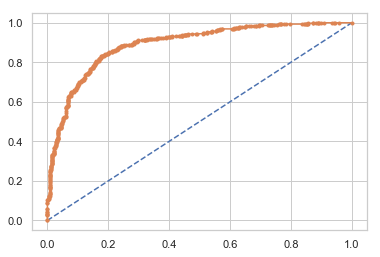

In [50]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.868


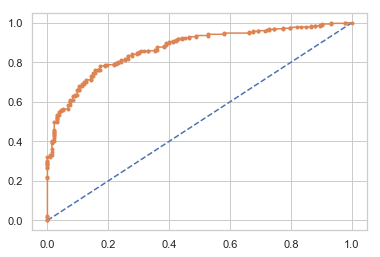

In [51]:
# AUC and ROC for the test data


# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [52]:
lda_metrics=classification_report(y_train, pred_class_train,output_dict=True)
dftra=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(dftra.loc["1"][2],2)
lda_train_recall=round(dftra.loc["1"][1],2)
lda_train_precision=round(dftra.loc["1"][0],2)
lda_train_acc=round(dftra.loc["accuracy"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)
print ('lda_train_f1 ',lda_train_acc)

lda_train_precision  0.89
lda_train_recall  0.87
lda_train_f1  0.91
lda_train_f1  0.84


In [53]:
lda_metrics=classification_report(y_test, pred_class_test,output_dict=True)
dfte=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(dfte.loc["1"][2],2)
lda_test_recall=round(dfte.loc["1"][1],2)
lda_test_precision=round(dfte.loc["1"][0],2)
lda_test_acc=round(dfte.loc["accuracy"][0],2)
print ('lda_train_precision ',lda_test_precision)
print ('lda_train_recall ',lda_test_recall)
print ('lda_train_f1 ',lda_test_f1)
print ('lda_train_acc ',lda_test_acc)

lda_train_precision  0.86
lda_train_recall  0.86
lda_train_f1  0.87
lda_train_acc  0.81


In [54]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data1 = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data1,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.84,0.81,0.84,0.81
AUC,0.89,0.87,0.89,0.87
Recall,0.86,0.85,0.87,0.86
Precision,0.89,0.87,0.89,0.86
F1 Score,0.91,0.90,0.91,0.87


From the above table, we can infer that the accuracy and AUC for train and test data in logistic regression and LDA are same. recall,precision and F1 score are close to each other in both training and testing data. From the output, Logistic regression and LDA gives good result.

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

##### K-Nearest Neighbors Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )

In [56]:
NNH.fit(X_train, y_train)

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7, weights='distance')

In [57]:
train_predict_NNH = NNH.predict(X_train)
NNH.score(X_train, y_train)

0.9653233364573571

In [58]:
confusion_matrix(y_train, train_predict_NNH)

array([[322,   7],
       [ 30, 708]], dtype=int64)

In [59]:
print(classification_report(y_train, train_predict_NNH))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       329
           1       0.99      0.96      0.97       738

    accuracy                           0.97      1067
   macro avg       0.95      0.97      0.96      1067
weighted avg       0.97      0.97      0.97      1067



AUC: 0.997


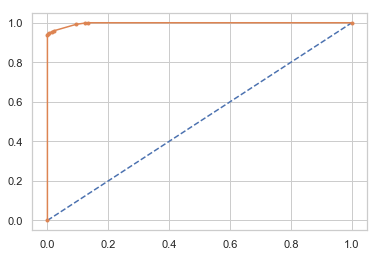

In [60]:
# predict probabilities
probs = NNH.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
NNH_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NNH_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [61]:
nnh_metrics=classification_report(y_train, train_predict_NNH,output_dict=True)
dftr=pd.DataFrame(nnh_metrics).transpose()
nnh_train_f1=round(dftr.loc["1"][2],2)
nnh_train_recall=round(dftr.loc["1"][1],2)
nnh_train_precision=round(dftr.loc["1"][0],2)
nnh_train_acc=round(dftr.loc["accuracy"][0],2)

print ('nnh_train_precision ',nnh_train_precision)
print ('nnh_train_recall ',nnh_train_recall)
print ('nnh_train_f1 ',nnh_train_f1)
print ('nnh_train_acc ',nnh_train_acc)

nnh_train_precision  0.97
nnh_train_recall  0.99
nnh_train_f1  0.96
nnh_train_acc  0.97


In [62]:
test_predict_NNH = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7947598253275109

In [63]:
confusion_matrix(y_test, test_predict_NNH)

array([[ 89,  44],
       [ 50, 275]], dtype=int64)

In [64]:
print(classification_report(y_test, test_predict_NNH))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       133
           1       0.86      0.85      0.85       325

    accuracy                           0.79       458
   macro avg       0.75      0.76      0.75       458
weighted avg       0.80      0.79      0.80       458



AUC: 0.827


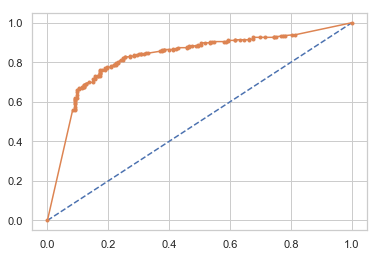

In [65]:
# predict probabilities
probs = NNH.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
NNH_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NNH_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [66]:
nnh_metrics=classification_report(y_test, test_predict_NNH,output_dict=True)
dftr=pd.DataFrame(nnh_metrics).transpose()
nnh_test_f1=round(dftr.loc["1"][2],2)
nnh_test_recall=round(dftr.loc["1"][1],2)
nnh_test_precision=round(dftr.loc["1"][0],2)
nnh_test_acc=round(dftr.loc["accuracy"][0],2)

print ('nnh_test_precision ',nnh_test_precision)
print ('nnh_test_recall ',nnh_test_recall)
print ('nnh_test_f1 ',nnh_test_f1)
print ('nnh_test_acc ',nnh_test_acc)

nnh_test_precision  0.85
nnh_test_recall  0.86
nnh_test_f1  0.85
nnh_test_acc  0.79


##### Naive Bayes algorithm

In [67]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
NBA = GaussianNB()

NBA.fit(X_train, y_train)

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [68]:
NBA_train_predict = NBA.predict(X_train)

In [69]:
NBA.score(X_train, y_train)

0.8341143392689785

In [70]:
confusion_matrix(y_train, NBA_train_predict)

array([[235,  94],
       [ 83, 655]], dtype=int64)

In [71]:
print(classification_report(y_train, NBA_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       329
           1       0.87      0.89      0.88       738

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



AUC: 0.889


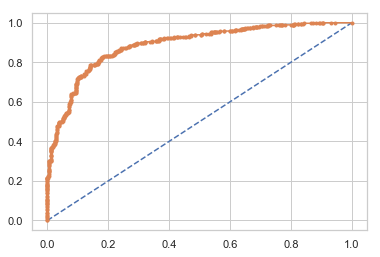

In [72]:
# predict probabilities
probs = NBA.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
NBA_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NBA_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [73]:
nba_metrics=classification_report(y_train, NBA_train_predict,output_dict=True)
dftr=pd.DataFrame(nba_metrics).transpose()
nba_train_f1=round(dftr.loc["1"][2],2)
nba_train_recall=round(dftr.loc["1"][1],2)
nba_train_precision=round(dftr.loc["1"][0],2)
nba_train_acc=round(dftr.loc["accuracy"][0],2)

print ('nba_train_precision ',nba_train_precision)
print ('nba_train_recall ',nba_train_recall)
print ('nba_train_f1 ',nba_train_f1)
print ('nba_train_acc ',nba_train_acc)

nba_train_precision  0.88
nba_train_recall  0.87
nba_train_f1  0.89
nba_train_acc  0.83


In [74]:
NBA_test_predict = NBA.predict(X_test)

In [75]:
NBA.score(X_test, y_test)

0.8100436681222707

In [76]:
confusion_matrix(y_test, NBA_test_predict)

array([[ 86,  47],
       [ 40, 285]], dtype=int64)

In [77]:
print(classification_report(y_test, NBA_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       133
           1       0.86      0.88      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.77       458
weighted avg       0.81      0.81      0.81       458



AUC: 0.865


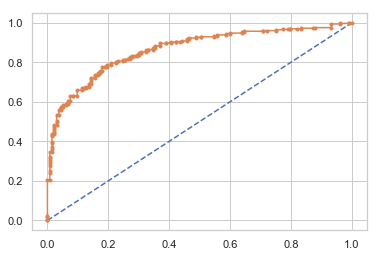

In [78]:
# predict probabilities
probs = NBA.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
NBA_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NBA_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [79]:
nba_metrics=classification_report(y_test, NBA_test_predict,output_dict=True)
dftr=pd.DataFrame(nba_metrics).transpose()
nba_test_f1=round(dftr.loc["1"][2],2)
nba_test_recall=round(dftr.loc["1"][1],2)
nba_test_precision=round(dftr.loc["1"][0],2)
nba_test_acc=round(dftr.loc["accuracy"][0],2)

print ('nba_test_precision ',nba_test_precision)
print ('nba_test_recall ',nba_test_recall)
print ('nba_test_f1 ',nba_test_f1)
print ('nba_test_acc ',nba_test_acc)

nba_test_precision  0.87
nba_test_recall  0.86
nba_test_f1  0.88
nba_test_acc  0.81


In [80]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data2 = pd.DataFrame({'NNH Train':[nnh_train_acc,NNH_train_auc,nnh_train_recall,nnh_train_precision,nnh_train_f1],
        'NNH Test':[nnh_test_acc,NNH_test_auc,nnh_test_recall,nnh_test_precision,nnh_test_f1],
       'NBA Train':[nba_train_acc,NBA_train_auc,nba_train_recall,nba_train_precision,nba_train_f1],
        'NBA Test':[nba_test_acc,NBA_test_auc,nba_test_recall,nba_test_precision,nba_test_f1],},index=index)
round(data2,2)

,NNH Train,NNH Test,NBA Train,NBA Test
Accuracy,0.97,0.79,0.83,0.81
AUC,1.00,0.83,0.89,0.87
Recall,0.99,0.86,0.87,0.86
Precision,0.97,0.85,0.88,0.87
F1 Score,0.96,0.85,0.89,0.88


From the above table, we can infer that Naive Bayes Algorithm gives the better result for testing data.

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image 

In [82]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3,5,7,10,20,30,50],
    'min_samples_leaf': [20,30,40,50,100,150], 
    'min_samples_split': [150,300,450],
}

In [83]:
dtcl = DecisionTreeClassifier(random_state=42)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 3)

In [84]:
grid_search_dtcl.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 7, 10, 20, 30, 50],
                         'min_samples_leaf': [20, 30, 40, 50, 100, 150],
                         'min_samples_split': [150, 300, 450]})

In [85]:
grid_search_dtcl.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 20,
 'min_samples_split': 150}

In [86]:
best_grid_dtcl = grid_search_dtcl.best_estimator_

In [87]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

In [88]:
dtcl_train = confusion_matrix(y_train, ytrain_predict_dtcl)
dtcl_train

array([[221, 108],
       [ 98, 640]], dtype=int64)

In [89]:
dtcl_test = confusion_matrix(y_test, ytest_predict_dtcl)
dtcl_test

array([[ 87,  46],
       [ 48, 277]], dtype=int64)

In [90]:
print(best_grid_dtcl.score(X_train, y_train))
print(best_grid_dtcl.score(X_test, y_test))

0.8069353327085286
0.7947598253275109


In [91]:
print(classification_report(y_train,ytrain_predict_dtcl),"\n")

              precision    recall  f1-score   support

           0       0.69      0.67      0.68       329
           1       0.86      0.87      0.86       738

    accuracy                           0.81      1067
   macro avg       0.77      0.77      0.77      1067
weighted avg       0.81      0.81      0.81      1067
 



In [92]:
nba_metrics=classification_report(y_train, ytrain_predict_dtcl,output_dict=True)
dftr=pd.DataFrame(nba_metrics).transpose()
dtcl_train_f1=round(dftr.loc["1"][2],2)
dtcl_train_recall=round(dftr.loc["1"][1],2)
dtcl_train_precision=round(dftr.loc["1"][0],2)
dtcl_train_acc=round(dftr.loc["accuracy"][0],2)

print ('dtcl_train_precision ',dtcl_train_precision)
print ('dtcl_train_recall ',dtcl_train_recall)
print ('dtcl_train_f1 ',dtcl_train_f1)
print ('dtcl_train_acc ',dtcl_train_acc)

dtcl_train_precision  0.86
dtcl_train_recall  0.86
dtcl_train_f1  0.87
dtcl_train_acc  0.81


AUC: 0.864


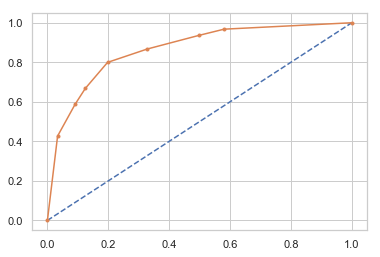

In [93]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
dtcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dtcl_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [94]:
print(classification_report(y_test,ytest_predict_dtcl),"\n")

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       133
           1       0.86      0.85      0.85       325

    accuracy                           0.79       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.79      0.80       458
 



In [95]:
nba_metrics=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
dftr=pd.DataFrame(nba_metrics).transpose()
dtcl_test_f1=round(dftr.loc["1"][2],2)
dtcl_test_recall=round(dftr.loc["1"][1],2)
dtcl_test_precision=round(dftr.loc["1"][0],2)
dtcl_test_acc=round(dftr.loc["accuracy"][0],2)

print ('dtcl_test_precision ',dtcl_test_precision)
print ('dtcl_test_recall ',dtcl_test_recall)
print ('dtcl_test_f1 ',dtcl_test_f1)
print ('dtcl_test_acc ',dtcl_test_acc)

dtcl_test_precision  0.85
dtcl_test_recall  0.86
dtcl_test_f1  0.85
dtcl_test_acc  0.79


AUC: 0.846


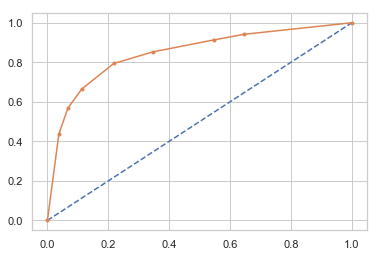

In [96]:
# predict probabilities
probs = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
DTCL_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % DTCL_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [97]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values("Imp",ascending=False))

                              Imp
Hague                    0.517358
Blair                    0.320568
Europe                   0.162074
economic.cond.national   0.000000
economic.cond.household  0.000000
political.knowledge      0.000000
gender_male              0.000000


##### Bagging (Using Random Forest clasifier)

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=42,n_jobs=-1,max_depth=7,oob_score=True)
rfcl = rfcl.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=rfcl)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
y_predict_bgcl_train = bgcl.predict(X_train)

In [101]:
bgcl.score(X_train, y_train)

0.887535145267104

In [102]:
confusion_matrix(y_train, y_predict_bgcl_train)

array([[258,  71],
       [ 49, 689]], dtype=int64)

In [103]:
print(classification_report(y_train,y_predict_bgcl_train),"\n")

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       329
           1       0.91      0.93      0.92       738

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067
 



In [104]:
y_predict_bgcl_test = bgcl.predict(X_test)

In [105]:
bgcl.score(X_test, y_test)

0.8056768558951966

In [106]:
confusion_matrix(y_test, y_predict_bgcl_test)

array([[ 80,  53],
       [ 36, 289]], dtype=int64)

In [107]:
print(classification_report(y_test,y_predict_bgcl_test),"\n")

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       133
           1       0.85      0.89      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.75       458
weighted avg       0.80      0.81      0.80       458
 



In [108]:
nba_metrics=classification_report(y_train, y_predict_bgcl_train,output_dict=True)
dftr=pd.DataFrame(nba_metrics).transpose()
bgcl_train_f1=round(dftr.loc["1"][2],2)
bgcl_train_recall=round(dftr.loc["1"][1],2)
bgcl_train_precision=round(dftr.loc["1"][0],2)
bgcl_train_acc=round(dftr.loc["accuracy"][0],2)

print ('bgcl_train_precision ',bgcl_train_precision)
print ('bgcl_train_recall ',bgcl_train_recall)
print ('bgcl_train_f1 ',bgcl_train_f1)
print ('bgcl_train_acc ',bgcl_train_acc)

bgcl_train_precision  0.92
bgcl_train_recall  0.91
bgcl_train_f1  0.93
bgcl_train_acc  0.89


AUC: 0.950


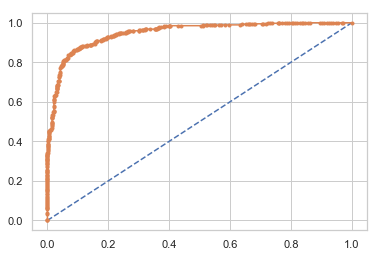

In [109]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
BGCL_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % BGCL_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [110]:
nba_metrics=classification_report(y_test, y_predict_bgcl_test,output_dict=True)
dftr=pd.DataFrame(nba_metrics).transpose()
bgcl_test_f1=round(dftr.loc["1"][2],2)
bgcl_test_recall=round(dftr.loc["1"][1],2)
bgcl_test_precision=round(dftr.loc["1"][0],2)
bgcl_test_acc=round(dftr.loc["accuracy"][0],2)

print ('bgcl_test_precision ',bgcl_test_precision)
print ('bgcl_test_recall ',bgcl_test_recall)
print ('bgcl_test_f1 ',bgcl_test_f1)
print ('bgcl_test_acc ',bgcl_test_acc)

bgcl_test_precision  0.87
bgcl_test_recall  0.85
bgcl_test_f1  0.89
bgcl_test_acc  0.81


AUC: 0.878


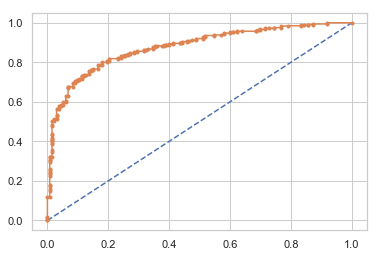

In [111]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
BGCL_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % BGCL_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

##### Boosting(Ada Bossting)

In [112]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=42)
abcl = abcl.fit(X_train, y_train)

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
y_predict_abcl_train = abcl.predict(X_train)

In [114]:
abcl.score(X_train, y_train)

0.8434864104967198

In [115]:
confusion_matrix(y_train, y_predict_abcl_train)

array([[229, 100],
       [ 67, 671]], dtype=int64)

In [116]:
print(classification_report(y_train,y_predict_abcl_train),"\n")

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       329
           1       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067
 



In [117]:
y_predict_abcl_test = abcl.predict(X_test)

In [118]:
abcl.score(X_test, y_test)

0.8100436681222707

In [119]:
confusion_matrix(y_test, y_predict_abcl_test)

array([[ 87,  46],
       [ 41, 284]], dtype=int64)

In [120]:
print(classification_report(y_test,y_predict_abcl_test),"\n")

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       133
           1       0.86      0.87      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.77       458
weighted avg       0.81      0.81      0.81       458
 



In [121]:
nba_metrics=classification_report(y_train, y_predict_abcl_train,output_dict=True)
dftr=pd.DataFrame(nba_metrics).transpose()
abcl_train_f1=round(dftr.loc["1"][2],2)
abcl_train_recall=round(dftr.loc["1"][1],2)
abcl_train_precision=round(dftr.loc["1"][0],2)
abcl_train_acc=round(dftr.loc["accuracy"][0],2)

print ('abcl_train_precision ',abcl_train_precision)
print ('abcl_train_recall ',abcl_train_recall)
print ('abcl_train_f1 ',abcl_train_f1)
print ('abcl_train_acc ',abcl_train_acc)

abcl_train_precision  0.89
abcl_train_recall  0.87
abcl_train_f1  0.91
abcl_train_acc  0.84


AUC: 0.893


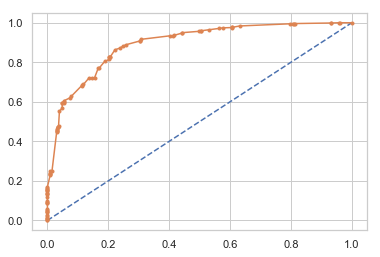

In [122]:
# predict probabilities
probs = abcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ABCL_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ABCL_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [123]:
nba_metrics=classification_report(y_test, y_predict_abcl_test,output_dict=True)
dftr=pd.DataFrame(nba_metrics).transpose()
abcl_test_f1=round(dftr.loc["1"][2],2)
abcl_test_recall=round(dftr.loc["1"][1],2)
abcl_test_precision=round(dftr.loc["1"][0],2)
abcl_test_acc=round(dftr.loc["accuracy"][0],2)

print ('abcl_test_precision ',abcl_test_precision)
print ('abcl_test_recall ',abcl_test_recall)
print ('abcl_test_f1 ',abcl_test_f1)
print ('abcl_test_acc ',abcl_test_acc)

abcl_test_precision  0.87
abcl_test_recall  0.86
abcl_test_f1  0.87
abcl_test_acc  0.81


AUC: 0.873


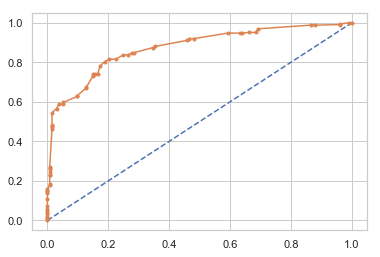

In [124]:
# predict probabilities
probs = abcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ABCL_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ABCL_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [125]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data3 = pd.DataFrame({'DTCL Train':[dtcl_train_acc,dtcl_train_auc,dtcl_train_recall,dtcl_train_precision,dtcl_train_f1],
        'DTCL Test':[dtcl_test_acc,DTCL_test_auc,dtcl_test_recall,dtcl_test_precision,dtcl_test_f1],
       'BGCL Train':[bgcl_train_acc,BGCL_train_auc,bgcl_train_recall,bgcl_train_precision,bgcl_train_f1],
        'BGCL Test':[bgcl_test_acc,BGCL_test_auc,bgcl_test_recall,bgcl_test_precision,bgcl_test_f1],
        'ABCL Train':[abcl_train_acc,ABCL_train_auc,abcl_train_recall,abcl_train_precision,abcl_train_f1],
        'ABCL Test':[abcl_test_acc,ABCL_test_auc,abcl_test_recall,abcl_test_precision,abcl_test_f1],},index=index)
round(data3,2)

,DTCL Train,DTCL Test,BGCL Train,BGCL Test,ABCL Train,ABCL Test
Accuracy,0.81,0.79,0.89,0.81,0.84,0.81
AUC,0.86,0.85,0.95,0.88,0.89,0.87
Recall,0.86,0.86,0.91,0.85,0.87,0.86
Precision,0.86,0.85,0.92,0.87,0.89,0.87
F1 Score,0.87,0.85,0.93,0.89,0.91,0.87


### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

In [126]:
pd.concat([data1, data2, data3], axis=1)

,LR Train,LR Test,LDA Train,LDA Test,NNH Train,NNH Test,NBA Train,NBA Test,DTCL Train,DTCL Test,BGCL Train,BGCL Test,ABCL Train,ABCL Test
Accuracy,0.840000,0.810000,0.840000,0.81000,0.970000,0.790000,0.830000,0.81000,0.810000,0.790000,0.890000,0.810000,0.840000,0.810000
AUC,0.891508,0.868329,0.891129,0.86974,0.997018,0.827311,0.888815,0.86509,0.864124,0.846142,0.949642,0.878392,0.892622,0.873083
Recall,0.860000,0.850000,0.870000,0.86000,0.990000,0.860000,0.870000,0.86000,0.860000,0.860000,0.910000,0.850000,0.870000,0.860000
Precision,0.890000,0.870000,0.890000,0.86000,0.970000,0.850000,0.880000,0.87000,0.860000,0.850000,0.920000,0.870000,0.890000,0.870000
F1 Score,0.910000,0.900000,0.910000,0.87000,0.960000,0.850000,0.890000,0.88000,0.870000,0.850000,0.930000,0.890000,0.910000,0.870000


Inference from the above table is, K-Nearest neighbour gives best result for train data , whereas Logistic Regression gives best result for test data.

The bagging classifier(using Random Forest classifier) gives the best result for both training and test data.



### 2.) In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1.)President Franklin D. Roosevelt in 1941

2.)President John F. Kennedy in 1961

3.)President Richard Nixon in 1973

In [207]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('inaugural')
nltk.download('stopwords')
from nltk.corpus import inaugural
import string
inaugural.fileids
Roosevelt = inaugural.raw('1941-Roosevelt.txt')
Kennedy = inaugural.raw('1961-Kennedy.txt')
Nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [180]:
print("Number of Character in 1941-Roosevelt text file ",len(Roosevelt))
print("Number of words in 1941-Roosevelt text file ",len(word_tokenize(Roosevelt)))
print("Number of sentence in 1941-Roosevelt text file ",len(sent_tokenize(Roosevelt)))

Number of Character in 1941-Roosevelt text file  7571
Number of words in 1941-Roosevelt text file  1526
Number of sentence in 1941-Roosevelt text file  68


In [181]:
print("Number of Character in 1961-Kennedy text file ",len(Kennedy))
print("Number of words in 1961-Kennedy text file ",len(word_tokenize(Kennedy)))
print("Number of sentence in 1961-Kennedy text file ",len(sent_tokenize(Kennedy)))

Number of Character in 1961-Kennedy text file  7618
Number of words in 1961-Kennedy text file  1543
Number of sentence in 1961-Kennedy text file  52


In [182]:
print("Number of Character in 1973-Nixon text file ",len(Nixon))
print("Number of words in 1973-Nixon text file ",len(word_tokenize(Nixon)))
print("Number of sentence 1973-Nixon text file ",len(sent_tokenize(Nixon)))

Number of Character in 1973-Nixon text file  9991
Number of words in 1973-Nixon text file  2006
Number of sentence 1973-Nixon text file  68


### 2.2 Remove all the stopwords from all three speeches.

In [218]:
stop_words = set(stopwords.words('english')+list(string.punctuation))
 
word_tokens = word_tokenize(Roosevelt)
 
filtered_sentence_Roosevelt = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence_Roosevelt = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence_Roosevelt.append(w)
filtered_sentence_Roosevelt

['On',
 'national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'United',
 'States',
 'In',
 'Washington',
 "'s",
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'In',
 'Lincoln',
 "'s",
 'day',
 'task',
 'people',
 'preserve',
 'Nation',
 'disruption',
 'within',
 'In',
 'day',
 'task',
 'people',
 'save',
 'Nation',
 'institutions',
 'disruption',
 'without',
 'To',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 '--',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'If',
 'risk',
 'real',
 'peril',
 'inaction',
 'Lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'The',
 'life',
 'man',
 'three-score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'The',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'There',
 'men',
 'doubt',
 'There',
 'men',
 'believe',
 'democracy',
 'form',
 'Government',
 'fra

In [219]:
print("Number of words count before removing stopwords in 1941-Roosevelt text file ",len(word_tokenize(Roosevelt)))
print("Number of words count after removing stopwords in 1941-Roosevelt text file ",len((filtered_sentence_Roosevelt)))

Number of words count before removing stopwords in 1941-Roosevelt text file  1526
Number of words count after removing stopwords in 1941-Roosevelt text file  720


In [220]:
stop_words = set(stopwords.words('english')+list(string.punctuation))
 
word_tokens = word_tokenize(Kennedy)
 
filtered_sentence_Kennedy = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence_Kennedy = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence_Kennedy.append(w)
filtered_sentence_Kennedy

['Vice',
 'President',
 'Johnson',
 'Mr.',
 'Speaker',
 'Mr.',
 'Chief',
 'Justice',
 'President',
 'Eisenhower',
 'Vice',
 'President',
 'Nixon',
 'President',
 'Truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 '--',
 'symbolizing',
 'end',
 'well',
 'beginning',
 '--',
 'signifying',
 'renewal',
 'well',
 'change',
 'For',
 'I',
 'sworn',
 'I',
 'Almighty',
 'God',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'The',
 'world',
 'different',
 'For',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'And',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 '--',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'God',
 'We',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'Let'

In [221]:
print("Number of words count before removing stopwords in 1961-Kennedy text file ",len(word_tokenize(Kennedy)))
print("Number of words count after removing stopwords in 1961-Kennedy text file ",len((filtered_sentence_Kennedy)))

Number of words count before removing stopwords in 1961-Kennedy text file  1543
Number of words count after removing stopwords in 1961-Kennedy text file  763


In [222]:
stop_words = set(stopwords.words('english')+list(string.punctuation))
 
word_tokens = word_tokenize(Nixon)
 
filtered_sentence_Nixon = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence_Nixon = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence_Nixon.append(w)
filtered_sentence_Nixon

['Mr.',
 'Vice',
 'President',
 'Mr.',
 'Speaker',
 'Mr.',
 'Chief',
 'Justice',
 'Senator',
 'Cook',
 'Mrs.',
 'Eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'When',
 'met',
 'four',
 'years',
 'ago',
 'America',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'As',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'The',
 'central',
 'question',
 'us',
 'How',
 'shall',
 'use',
 'peace',
 'Let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'Let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'America',
 'enter',
 'third',
 'century',
 'nation',
 'This',
 'past',
 'year',
 'saw',
 'far-reaching',
 'results',
 'new

In [223]:
print("Number of words count before removing stopwords in 1973-Nixon text file ",len(word_tokenize(Nixon)))
print("Number of words count after removing stopwords in 1973-Nixon text file ",len((filtered_sentence_Nixon)))

Number of words count before removing stopwords in 1973-Nixon text file  2006
Number of words count after removing stopwords in 1973-Nixon text file  924


### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [224]:
fdist_Roosevelt = nltk.FreqDist(filtered_sentence_Roosevelt)
fdist_Roosevelt.most_common(3)

[('--', 25), ('It', 13), ('The', 10)]

In [225]:
fdist_Kennedy = nltk.FreqDist(filtered_sentence_Kennedy)
fdist_Kennedy.most_common(3)

[('--', 25), ('us', 12), ('world', 8)]

In [226]:
fdist_Nixon = nltk.FreqDist(filtered_sentence_Nixon)
fdist_Nixon.most_common(3)

[('us', 26), ('America', 21), ('peace', 19)]

### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

In [240]:
for i in fdist_Roosevelt:
    print(i ," - ",len(nltk.FreqDist(i)))

On  -  2
national  -  6
day  -  3
inauguration  -  8
since  -  5
1789  -  4
people  -  4
renewed  -  5
sense  -  3
dedication  -  8
United  -  6
States  -  5
In  -  2
Washington  -  9
's  -  2
task  -  4
create  -  5
weld  -  4
together  -  6
nation  -  5
Lincoln  -  6
preserve  -  5
Nation  -  6
disruption  -  9
within  -  5
save  -  4
institutions  -  6
without  -  6
To  -  2
us  -  2
come  -  4
time  -  4
midst  -  5
swift  -  5
happenings  -  8
pause  -  5
moment  -  5
take  -  4
stock  -  5
--  -  1
recall  -  5
place  -  5
history  -  7
rediscover  -  8
may  -  3
If  -  2
risk  -  4
real  -  4
peril  -  5
inaction  -  6
Lives  -  5
nations  -  6
determined  -  7
count  -  5
years  -  5
lifetime  -  6
human  -  5
spirit  -  5
The  -  3
life  -  4
man  -  3
three-score  -  8
ten  -  3
little  -  4
less  -  3
fullness  -  6
measure  -  6
live  -  4
There  -  4
men  -  3
doubt  -  5
believe  -  5
democracy  -  8
form  -  4
Government  -  8
frame  -  5
limited  -  6
measured  -  7
kin